# Select images to use for our project

The full Coco training dataset has almost 120k images. This is too much to train our model on!

We could randomly sample from this data to create a train/val/test dataset.

To make our task slightly easier to start with, we could also select images containing only certain categores. After exploring the data below and selecting all images with 'sports' as a super categorie, we find that we have ~23k images, which seems more manageable.

### 1. Data exploration. 

Please skip this section, we are keeping the output as an audit train of what we did to understand the annotations file

In [83]:
import json
from pathlib import Path
from PIL import Image as PILImage
from matplotlib import pyplot as plt
import random
import numpy as np

In [24]:
instances_file = Path(r'/Users/alexxcollins/Library/CloudStorage/OneDrive-City,UniversityofLondon'
                      r'/modules/sequence_analysis/coursework/INM706-image-captioning/'
                      r'Datasets/coco/annotations/instances_train2017.json')
image_folder = Path(r'/Users/alexxcollins/Library/CloudStorage/OneDrive-City,UniversityofLondon'
                    r'/modules/sequence_analysis/coursework/INM706-image-captioning/'
                    r'Datasets/coco/images/train2017')

In [26]:
sorted(image_folder.glob('**/*'))[:3]

[PosixPath('/Users/alexxcollins/Library/CloudStorage/OneDrive-City,UniversityofLondon/modules/sequence_analysis/coursework/INM706-image-captioning/Datasets/coco/images/train2017/000000000009.jpg'),
 PosixPath('/Users/alexxcollins/Library/CloudStorage/OneDrive-City,UniversityofLondon/modules/sequence_analysis/coursework/INM706-image-captioning/Datasets/coco/images/train2017/000000000025.jpg'),
 PosixPath('/Users/alexxcollins/Library/CloudStorage/OneDrive-City,UniversityofLondon/modules/sequence_analysis/coursework/INM706-image-captioning/Datasets/coco/images/train2017/000000000030.jpg')]

In [6]:
with open(instances_file) as f:
    instances = json.load(f)

In [60]:
for key, val in instances.items():
    print('{:15}: type {}'.format(key, type(val)))
    if isinstance(val, list):
        print('first values:')
        for i in range(2):
            print('       {}'.format(val[i]))
    print('-'*10+'\n')

info           : type <class 'dict'>
----------

licenses       : type <class 'list'>
first values:
       {'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}
       {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}
----------

images         : type <class 'list'>
first values:
       {'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
       {'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}
---------

In [20]:
for key in instances['info'].keys():
    print(key)
print('\nlen of instances["info"]: {}'.format(len(instances['info'])))

description
url
version
year
contributor
date_created

len of instances["info"]: 6


In [61]:
len(instances['images'])

118287

In [58]:
instances['annotations'][0]
# len(instances['annotations'])

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [23]:
instances['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [40]:
def open_img(image_id):
    f = image_folder/(str(image_id).zfill(12) + '.jpg')
    im = PILImage.open(f)
    plt.imshow(im)

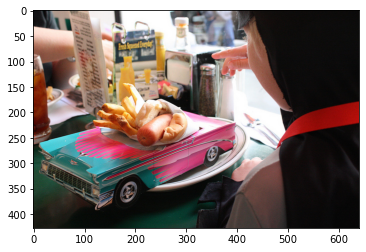

In [41]:
open_img(558840)

### Choose only images containing categories in certain super categories

* Define the categories / super categories we want to use
* Iterate through the annotations file, to extract all image ids with our selected categories in
* Remove suplicate image from the list
* Print some random images from our dataset

Also create an annotations list which is the subset of the full `instances['annotations']` list that we are interested in.

In [104]:
supers = ['sports']
ids = []
id_dict = {}
id_to_name = dict(zip([cat['id'] for cat in instances['categories']],
                     [cat['name'] for cat in instances['categories']]))
for d in instances['categories']:
    if d['supercategory'] in supers:
        ids.append(d['id'])
        id_dict[d['id']] = d['name']
id_dict

{34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket'}

In [100]:
img_list = []
full_img_list = []
annotations = []
for d in instances['annotations']:
    full_img_list.append(d['image_id'])
    if d['category_id'] in ids:
        img_list.append(d['image_id'])
        annotations.append(d)
print(len(img_list))
img_list = list(set(img_list))
full_img_list = list(set(full_img_list))
print(len(img_list))

50940
23218


Check if we actually have all the images in our list. The cell below takes ages to run!

Now extract list of categories in each image

In [102]:
cats = dict(zip(img_list, [[] for _ in range(len(img_list))]))
cats_full = dict(zip(full_img_list, [[] for _ in range(len(full_img_list))]))
for d in instances['annotations']:
    cats_full[d['image_id']].append(d['category_id'])
for k in img_list:
    cats[k] = cats_full[k]

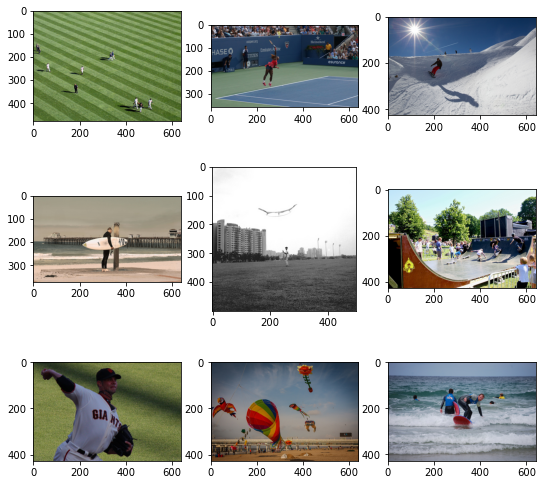

In [106]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(9,9))

for ax in axs.flatten():
    image_id = img_list[random.randint(0, len(img_list))]
    f = image_folder/(str(image_id).zfill(12) + '.jpg')
    im = PILImage.open(f)
    ax.imshow(im)
    # categories = [id_to_name[cat] for cat in cats[image_id]]
    # ax.set_title('\n'.join(categories))